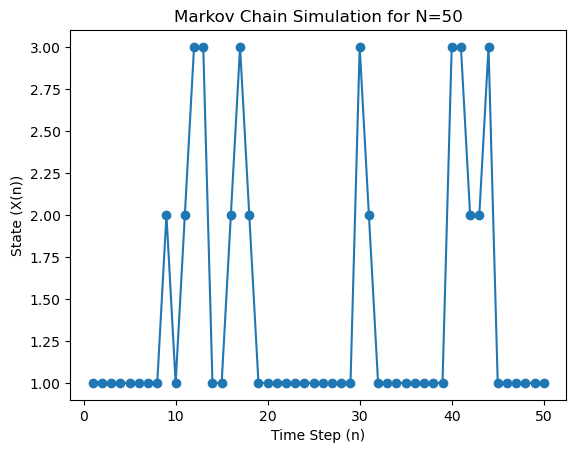

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_markov_chain(N, P, initial_state):
    states = np.zeros(N, dtype=int)
    states[0] = initial_state

    for n in range(1, N):
        # Generate a random number to determine the next state
        random_number = np.random.rand()
        cumulative_prob = 0
        for i in range(len(P)):
            j = states[n - 1] -1
            cumulative_prob += P[j, i]
            if random_number < cumulative_prob:
                states[n] = i+1
                break

    return states

# Transition probability matrix P
P = np.array([[0.8, 0.1, 0.1],
              [0.6, 0.2, 0.2],
              [0.4, 0.3, 0.3]])

#Q8.a
# Number of time steps
N = 50

# Initial state
initial_state = 1

# Simulate the Markov chain
states = simulate_markov_chain(N, P, initial_state)

# Plot the results
plt.plot(range(1, N + 1), states, marker='o')
plt.title(f'Markov Chain Simulation for N={N}')
plt.xlabel('Time Step (n)')
plt.ylabel('State (X(n))')
plt.show()


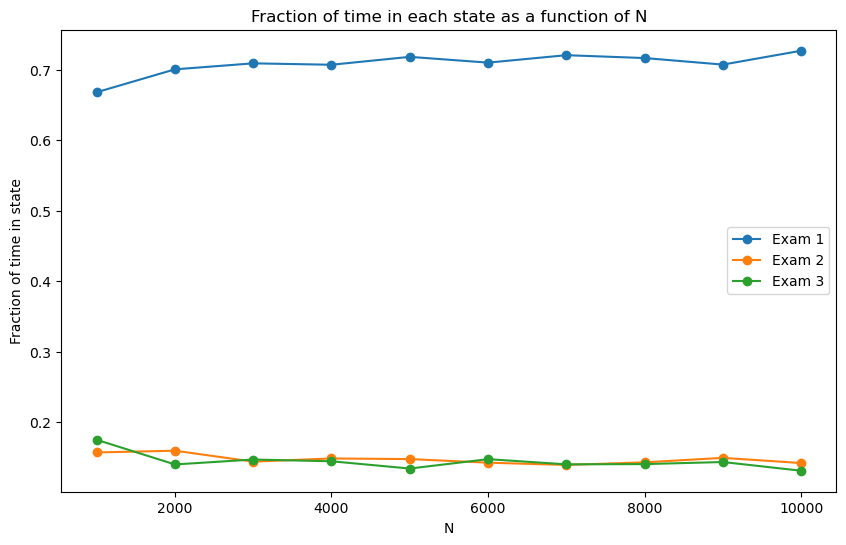

In [49]:
#Q8.b
# Define the range of N values  going from 1000 to 10,000 in steps of 1000.
N_values = range(1000, 10001, 1000)

# Initialize lists to store the fractions
fractions = [[], [], []]

# For each N, simulate the Markov chain and calculate the fractions
for N in N_values:
    states = simulate_markov_chain(N, P, initial_state)
    for i in range(1, 4):
        fractions[i-1].append(np.count_nonzero(states == i) / N)

# Plot the fractions as a function of N for each state
plt.figure(figsize=(10, 6))
for i in range(1, 4):
    plt.plot(N_values, fractions[i-1], marker='o', label=f'Exam {i}')
plt.title('Fraction of time in each state as a function of N')
plt.xlabel('N')
plt.ylabel('Fraction of time in state')
plt.legend()
plt.show()